In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Cargo Dataset

In [2]:
dir_rojo="rojo.xls"
dir_azul="azul.xls"
dir_verde="verde.xls"

dir_acQu="aceroQuirurgico.xls"
dir_paMa="papelMadera.xls"
dir_piMa="pielMano.xls"
dir_plNe="plasticoNegro.xls"
dir_poBl="porcelanaBlanca.xls"
dir_teBl="telgoporBlanco.xls"
dir_liFi="lijafina.xls"
dir_liGr="lijagruesa.xls"

dir_Algo="algodon.xls"
dir_cian="cian.xls"
dir_magenta="magenta.xls"
dir_VerAz="verdeyazul.xls"
dir_RoAz="rojoyazul.xls"



rojo=pd.read_excel(dir_rojo,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
azul=pd.read_excel(dir_azul,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
verde=pd.read_excel(dir_verde,header=1,usecols=["Valor_R","Valor_V","Valor_A"])

aceroQuirurgico=pd.read_excel(dir_acQu,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
papelMadera=pd.read_excel(dir_paMa,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
pielMano=pd.read_excel(dir_piMa,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
plasticoNegro=pd.read_excel(dir_plNe,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
porcelanaBlanca=pd.read_excel(dir_poBl,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
telgoporBlanco=pd.read_excel(dir_teBl,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
lijaFina=pd.read_excel(dir_liFi,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
lijaGruesa=pd.read_excel(dir_liGr,header=1,usecols=["Valor_R","Valor_V","Valor_A"])

algodon=pd.read_excel(dir_Algo,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
cian=pd.read_excel(dir_cian,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
magenta=pd.read_excel(dir_magenta,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
verdeyazul=pd.read_excel(dir_VerAz,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
rojoyazul=pd.read_excel(dir_RoAz,header=1,usecols=["Valor_R","Valor_V","Valor_A"])


# Cargo Etiquetas

In [3]:
rojo.drop(0, inplace=True)
azul.drop(0, inplace=True)
verde.drop(0, inplace=True)

aceroQuirurgico.drop(0, inplace=True)
papelMadera.drop(0, inplace=True)
pielMano.drop(0, inplace=True)
plasticoNegro.drop(0, inplace=True)
porcelanaBlanca.drop(0, inplace=True)
telgoporBlanco.drop(0, inplace=True)
lijaFina.drop(0, inplace=True)
lijaGruesa.drop(0, inplace=True)

algodon.drop(0, inplace=True)
cian.drop(0, inplace=True)
magenta.drop(0, inplace=True)
verdeyazul.drop(0, inplace=True)
rojoyazul.drop(0, inplace=True)

rojo["etiqueta"]=0
azul["etiqueta"]=1
verde["etiqueta"]=2

aceroQuirurgico["etiqueta"]=3
papelMadera["etiqueta"]=4
pielMano["etiqueta"]=5
plasticoNegro["etiqueta"]=6
porcelanaBlanca["etiqueta"]=7
telgoporBlanco["etiqueta"]=8
lijaFina["etiqueta"]=9
lijaGruesa["etiqueta"]=10

algodon["etiqueta"]=11
cian["etiqueta"]=12
magenta["etiqueta"]=13
verdeyazul["etiqueta"]=14
rojoyazul["etiqueta"]=15

df=pd.concat([rojo, azul, verde,aceroQuirurgico,papelMadera,pielMano,plasticoNegro,porcelanaBlanca,telgoporBlanco,lijaFina,lijaGruesa,algodon,cian,magenta,verdeyazul,rojoyazul], axis=0,ignore_index=True)

In [4]:
pd.get_dummies(df["etiqueta"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Separo en Train y Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["etiqueta"]), test_size = 0.3, stratify = df["etiqueta"])

In [6]:
X_train.shape

(22388, 3)

# Creacion de modelo

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=3,activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [8]:
model=create_model()
history = model.fit(X_train, y_train,epochs=100,validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
700/700 [==============================] - 3s 3ms/step - loss: 121.8004 - accuracy: 0.1105 - val_loss: 42.5018 - val_accuracy: 0.1458
Epoch 2/100
700/700 [==============================] - 2s 2ms/step - loss: 30.9357 - accuracy: 0.1612 - val_loss: 20.7555 - val_accuracy: 0.2404
Epoch 3/100
700/700 [==============================] - 2s 3ms/step - loss: 11.7813 - accuracy: 0.2049 - val_loss: 6.2393 - val_accuracy: 0.3530
Epoch 4/100
700/700 [==============================] - 2s 3ms/step - loss: 5.4521 - accuracy: 0.4980 - val_loss: 4.2978 - val_accuracy: 0.5709
Epoch 5/10

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Evaluacion de modelo

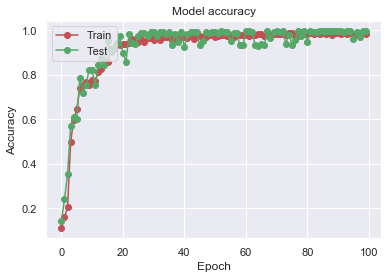

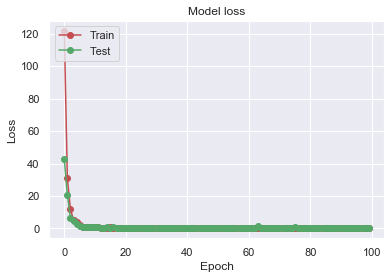

In [10]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'],'o-', color="r",label="Training score")
plt.plot(history.history['val_accuracy'], 'o-', color="g",label="Test score")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'],'o-', color="r",label="Training score")
plt.plot(history.history['val_loss'], 'o-', color="g",label="Test score")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(111.5, 0.5, 'true')

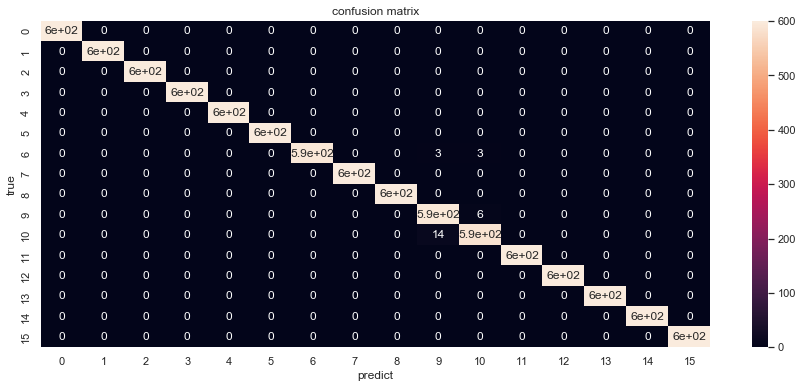

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots(figsize=(15,6))

y_pred=model.predict(X_test)
C2= confusion_matrix(np.argmax(y_test.to_numpy(), axis=1),np.argmax(y_pred, axis=1))

sns.heatmap(C2,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('confusion matrix') #título
ax.set_xlabel('predict') #eje x
ax.set_ylabel('true') #eje y

# Optimizacion de parametros

In [12]:
parameters = {'batch_size': [16,32,64], 'epochs':[10,70,100]}

In [13]:
estimator = KerasClassifier(build_fn=create_model, verbose=0)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='roc_auc_ovr', cv=10,n_jobs=-1)

C:\Users\ADMIN1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [27]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                64        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


{'batch_size': 16, 'epochs': 70}

In [28]:
best_epochs= grid_search.best_params_['epochs']
best_batch= grid_search.best_params_['batch_size']

# Validacion Cruzada

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["etiqueta"]), test_size = 0.1, stratify = df["etiqueta"])

In [32]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

estimator = KerasClassifier(build_fn=create_model, verbose=2, batch_size=best_batch, epochs=best_epochs)

accuracies = cross_val_score(estimator, X_train,  y_train, cv=10, n_jobs=-1)
mean_acc = accuracies.mean()
variance_acc = accuracies.std()
print('Precision media: ', mean_acc,"+/-",variance_acc)

C:\Users\ADMIN1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


Precision media:  0.9586963295936585 +/- 0.034948556392302765


# Pesos del modelo

In [18]:
weights = model.get_weights()
weights

[array([[-0.6253819 ,  0.6402558 ,  0.7315958 , -0.157087  , -0.2796196 ,
         -0.36351466,  0.53713095, -0.0332643 ,  0.3225097 ,  0.13049965,
          0.28945106,  0.01583506,  0.8619777 , -0.4209774 ,  0.6219712 ,
         -0.16828847],
        [ 0.55097234,  0.2147235 , -0.82305175,  0.34974766,  0.10634955,
          0.48321602,  0.07216033,  0.1458602 ,  0.08742931,  0.1451781 ,
          0.23819429,  0.03626081, -0.42877027,  0.86228704,  0.12278113,
          0.7121539 ],
        [ 0.49116465, -0.57410747,  0.54581094,  0.40838584,  0.82741344,
          0.46353158, -0.12655836,  0.6219479 ,  0.17330442,  0.39037892,
          0.01212402,  0.35666707, -0.10231501, -0.20726198, -0.350343  ,
         -0.09243802]], dtype=float32),
 array([ 8.6934674e-01, -1.6040288e+00, -3.0411396e+00,  9.2198582e+00,
        -4.2633052e+00, -4.8168931e+00, -5.6632471e+00, -6.0232849e+00,
         1.8121088e+00, -8.2907791e+00, -1.8871977e+00,  2.3661432e+01,
         3.6174040e+00, -4.00743

In [20]:
weights[0].shape

(3, 16)

In [17]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 3], "dtype": "float32", "units": 16, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}]}, "keras_version": "2.7.0", "backend": "tensorflow"}'